# Case Study
Let's proceed with the Wine Dataset and apply the same classification methods we used before, including Nearest Neighbors (KNN), Decision Trees, SVM, Naive Bayes, and Logistic Regression. We will explore each method with different hyperparameters and summarize their performance in terms of accuracy. At the end, we will visualize the results for comparison.

The Wine Dataset is a popular dataset for classification tasks, where the target class represents the origin of different wines. It contains 13 features that describe various properties of the wines.



## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Wine dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Apply Nearest Neighbors (KNN) with different values of k.

In [2]:
# Create a list of k values
k_values = range(1, 51, 4)

# Create an empty dictionary to store the results
knn_results = {}

# Train KNN models with different k values
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_results[k] = accuracy


## Apply Decision Trees with different values of max depth.

In [3]:
# Create a list of max depth values
max_depth_values = range(1, 21, 2)

# Create an empty dictionary to store the results
dt_results = {}

# Train Decision Tree models with different max depth values
for max_depth in max_depth_values:
    dt_model = DecisionTreeClassifier(max_depth=max_depth)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    dt_results[max_depth] = accuracy


##  Apply SVM with different values of C.

In [4]:
# Create a list of C values
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 200]

# Create an empty dictionary to store the results
svm_results = {}

# Train SVM models with different C values
for C in C_values:
    svm_model = SVC(C=C)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    svm_results[C] = accuracy


## Apply Naive Bayes (GaussianNB).

In [5]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred)


## Apply Logistic Regression with different values of C.

In [6]:
# Create an empty dictionary to store the results
logreg_results = {}

# Train Logistic Regression models with different C values
for C in C_values:
    lr_model = LogisticRegression(C=C, random_state=42, max_iter=10000)
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    logreg_results[C] = accuracy


## Summarize the performance of each method in terms of accuracy.

In [7]:
# Print the results of each method
print("Results of Classification Methods:")
print("KNN:")
for k, accuracy in knn_results.items():
    print(f"k = {k}, Accuracy: {accuracy:.2f}")

print("\nDecision Trees:")
for max_depth, accuracy in dt_results.items():
    print(f"Max Depth = {max_depth}, Accuracy: {accuracy:.2f}")

print("\nSVM:")
for C, accuracy in svm_results.items():
    print(f"C = {C}, Accuracy: {accuracy:.2f}")

print("\nNaive Bayes:")
print(f"Accuracy: {nb_accuracy:.2f}")

print("\nLogistic Regression:")
for C, accuracy in logreg_results.items():
    print(f"C = {C}, Accuracy: {accuracy:.2f}")


Results of Classification Methods:
KNN:
k = 1, Accuracy: 0.78
k = 5, Accuracy: 0.72
k = 9, Accuracy: 0.72
k = 13, Accuracy: 0.72
k = 17, Accuracy: 0.78
k = 21, Accuracy: 0.78
k = 25, Accuracy: 0.78
k = 29, Accuracy: 0.78
k = 33, Accuracy: 0.78
k = 37, Accuracy: 0.81
k = 41, Accuracy: 0.81
k = 45, Accuracy: 0.81
k = 49, Accuracy: 0.75

Decision Trees:
Max Depth = 1, Accuracy: 0.67
Max Depth = 3, Accuracy: 0.94
Max Depth = 5, Accuracy: 0.94
Max Depth = 7, Accuracy: 0.94
Max Depth = 9, Accuracy: 0.94
Max Depth = 11, Accuracy: 0.94
Max Depth = 13, Accuracy: 0.94
Max Depth = 15, Accuracy: 0.94
Max Depth = 17, Accuracy: 0.94
Max Depth = 19, Accuracy: 0.94

SVM:
C = 0.001, Accuracy: 0.39
C = 0.01, Accuracy: 0.39
C = 0.1, Accuracy: 0.78
C = 1, Accuracy: 0.81
C = 10, Accuracy: 0.78
C = 100, Accuracy: 0.83
C = 200, Accuracy: 0.83

Naive Bayes:
Accuracy: 1.00

Logistic Regression:
C = 0.001, Accuracy: 0.89
C = 0.01, Accuracy: 1.00
C = 0.1, Accuracy: 1.00
C = 1, Accuracy: 1.00
C = 10, Accuracy: 1.

## Visualize the accuracy for each method.

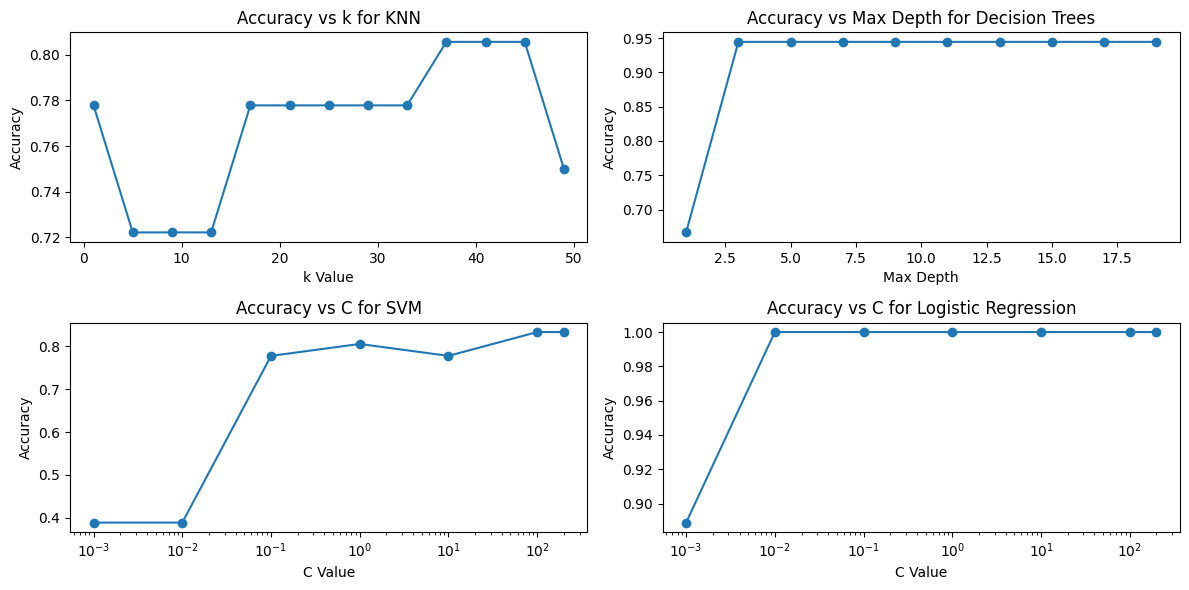

In [8]:
# Visualize the accuracy vs hyperparameter for each method
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(list(knn_results.keys()), list(knn_results.values()), marker='o')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for KNN')

plt.subplot(2, 2, 2)
plt.plot(list(dt_results.keys()), list(dt_results.values()), marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Decision Trees')

plt.subplot(2, 2, 3)
plt.plot(C_values, list(svm_results.values()), marker='o')
plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C for SVM')

plt.subplot(2, 2, 4)
plt.plot(C_values, list(logreg_results.values()), marker='o')
plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C for Logistic Regression')

plt.tight_layout()
plt.show()

## Conclusion
This tutorial covers various classification methods (KNN, Decision Trees, SVM, Naive Bayes, and Logistic Regression) using the Wine Dataset. It demonstrates how to apply each method with different hyperparameters, summarizes their performance in terms of accuracy, and visualizes the accuracy for comparison.

Feel free to experiment with other classification algorithms, hyperparameters, or additional datasets to further explore different classification techniques.